This notebooks plots the diagrams for the [5th value proposition](https://www.notion.so/mortynia/VP5-Refactored-task-space-78509192c47b47b29d20ea7d272a6060), refactored task space.

In [2]:
# figure 1: number of tasks per publication

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('paper', 'whitegrid')  # noqa

from python.cogtext.datasets.pubmed import PubMedDataLoader

# load the data
PUBMED = PubMedDataLoader(preprocessed=False).load()

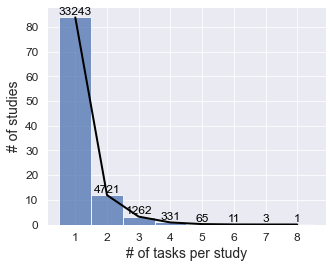

In [84]:
# number of tasks per study

task_counts_by_pmids = PUBMED.query('category.str.contains("Task")').groupby(['pmid','year'])[['category','label']].count()
task_counts_by_pmids['label'] = task_counts_by_pmids['label'].astype('category')

n_pubs = PUBMED.query('category.str.contains("Task")')['pmid'].nunique()

task_cnts = task_counts_by_pmids.value_counts().to_frame()
task_pcts = task_cnts * 100 / n_pubs

_, ax = plt.subplots(figsize=(5,4))

sns.histplot(task_counts_by_pmids,
            x='label',
            # color='gray',
            stat='percent',
            # hue='year',
            ax=ax,
            palette='Blues'
            ).set(
  xlabel='# of tasks per study',
  ylabel='% of studies',
  # ylim=(-1000,35000),
  # title='Number of cognitive tasks per article in a corpus of 39637 articles\n'
        # 'that mentioned at least one task name. Gray bar labels are the number of articles.'
)

g = sns.lineplot(data=task_pcts, x='label', y=0, lw=2, color='black')

# plot labels
for index, row in task_cnts.iterrows():
  x = row.name[0]
  y = task_pcts.loc[index] + 1.0
  lbl = round(row[0],2)
  g.text(x, y, lbl, color='black', ha='center', fontsize=12)

plt.ylabel('# of studies', fontsize=14)
plt.xlabel('# of tasks per study', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

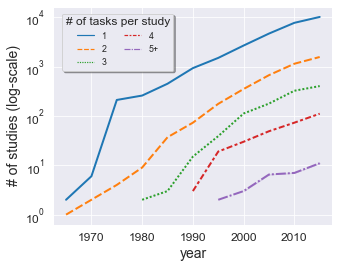

In [53]:
sns.set('paper')
cnts = PUBMED.query('category.str.contains("Task")').groupby(['pmid'])[['label']].count()

years = PUBMED.query('category.str.contains("Task")').groupby(['pmid']).apply(lambda x: x['year'].iloc[0])

cnts = pd.concat([cnts, years], axis=1).rename(columns={0:'year', 'label':'n_tasks'}).reset_index()
# cnts = cnts.set_index(['pmid','year'])

cnts
# sns.lineplot(data=cnts, x='year', y='label', hue='year', y=0, lw=2)

# cnts.groupby('label')
cnts['year'] = cnts['year'] // 5 * 5
# cnts = cnts.query('decade ')

cnts = cnts.groupby('n_tasks').apply(lambda x: x.groupby('year').count())['pmid'].reset_index()
cnts.rename(columns={'pmid':'n_articles'}, inplace=True)
# cnts = cnts.query('n_tasks > 1 and year < 2020')
cnts = cnts.query('year < 2020')

cnts['n_tasks'] = cnts['n_tasks'].replace([5,6,7,8],'5+')

plt.figure(figsize=(5,4))
g = sns.lineplot(data=cnts,
                 ci=False,
                 x='year', y='n_articles', hue='n_tasks', style='n_tasks', lw=2,
                 palette='tab10')
g.set(yscale='log')

plt.legend(title='# of tasks per study',
           bbox_to_anchor=(.43, .97),
           ncol=2,
           shadow=True,
           title_fontsize=12,
           borderaxespad=0.)

plt.ylabel('# of studies (log-scale)', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()